# Padrão Builder

### Permite criar objetos de forma versátil, definindo diversas formas diferentes de criar objetos com diferenres valores de atributos

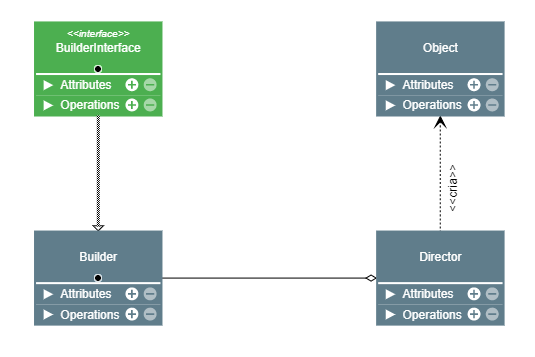

## Classes que devem ser definidas

1. Classe do objeto que se deseja criar, com os atributo definidos como None
2. Interface da classe Builder, que terá métodos abstratos para adicionar os atributos.
3. Criação de uma classe Builder concreta, na qual irá ser definida uma instância da classe que se deseja criar, implementando os métodos que irão setar os atributos de forma personalizada.
4. Criaçãoo de uma classe Director que irá receber um builder e implementar os atributos dessa classe de acordo com os métodos definidos anteriormente

In [1]:
from abc import ABC, abstractmethod

In [2]:
class Representarion:

    def __str__(self):
        params = [f'{k}={v}' for k, v in self.__dict__.items()]
        return f'{self.__class__.__name__}({", ".join(params)})'

    def __repr__(self):
        return self.__str__()

In [3]:
class User(Representarion):
    def __init__(self):
        self.firstname = None
        self.lastname = None
        self.birth = None
        self.phonenumbers = []
        self.addresses = []

In [4]:
class iUserBuilder(ABC):
    @property
    @abstractmethod
    def result(self): pass

    @abstractmethod
    def add_firstname(self, firstname: str): pass

    @abstractmethod
    def add_lastname(self, lastname: str): pass

    @abstractmethod
    def add_birth(self, birth: int): pass

    @abstractmethod
    def add_phonenumber(self, phonenumber: str): pass

    @abstractmethod
    def add_address(self, address: str): pass

In [5]:
class UserBuilder(iUserBuilder):
    def __init__(self):
        self.reset()

    def reset(self):
        self._result = User()

    def get_result(self) -> User:
        return self._result

    def add_firstname(self, firstname: str):
        self._result.firstname = firstname
        return self

    def add_lastname(self, lastname: str):
        self._result.lastname = lastname
        return self

    def add_birth(self, birth: int):
        self._result.birth = birth
        return self

    def add_phonenumber(self, phonenumber: str):
        self._result.phonenumbers.append(phonenumber)
        return self

    def add_address(self, address: str):
        self._result.addresses.append(address)
        return self

    @property
    def result(self):
        return_data = self._result
        self.reset()
        return return_data

In [6]:
class UserDirector:
    def __init__(self, builder: UserBuilder):
        self._builder = builder

    def user_from_age(self, firstname: str, lastname: str, age: int):
        from datetime import datetime
        current_year = datetime.now().year
        birth = current_year - age

        self._builder.add_firstname(firstname)\
            .add_lastname(lastname)\
            .add_birth(birth)

        return self._builder.result

    def with_address(self, firstname, lastname, address):
        self._builder.add_firstname(firstname)\
            .add_lastname(lastname)\
            .add_address(address)
        return self._builder.result

In [7]:
user_builder = UserBuilder()
user_director = UserDirector(user_builder)
user1 = user_director.user_from_age('Davi', 'Felix', 16)
user2 = user_director.with_address('Davi', 'Felix', 'Avenida 9 de Julho')
print(user1)
print(user2)

User(firstname=Davi, lastname=Felix, birth=2004, phonenumbers=[], addresses=[])
User(firstname=Davi, lastname=Felix, birth=None, phonenumbers=[], addresses=['Avenida 9 de Julho'])
